# roadmap visualization

In [1]:
import Random: seed!
import Printf: @sprintf, @printf
using MRMP
using Plots

# SSSP

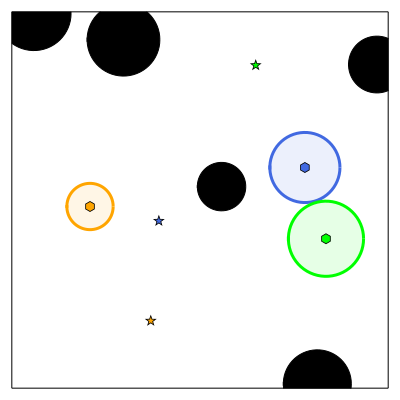

In [2]:
seed!(3)
ins = MRMP.gen_random_instance_StatePoint2D(;
    N = 3,
    rad_min = 0.025,
    rad_max = 0.1,
    num_obs = 5,
    rad_obs_min = 0.05,
    rad_obs_max = 0.10,
)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
N = length(config_init)
MRMP.plot_instance!(ins...)

In [3]:
seed!(2)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 5,
    VERBOSE = 2,
    epsilon=0.2,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
nothing

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		0.2352 sec, explored node: 00000030, f: 0.0000, depth: 0026  2.450281 seconds (6.73 M allocations: 364.556 MiB, 4.65% gc time, 99.80% compilation time)


┌ Info: 
│ 	0.7288 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


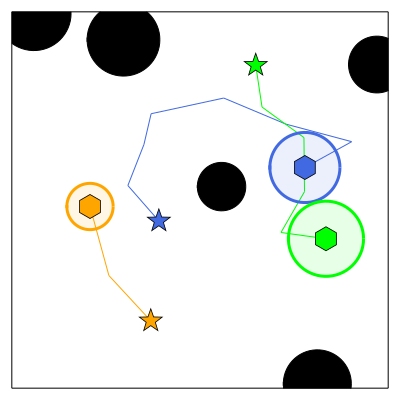

In [4]:
plot_res!(config_init, config_goal, obstacles, ins_params...; solution=solution)
for i = 1:N
    params_start_goal = Dict(
        :seriestype => :scatter,
        :markersize => 12,
        :label => nothing,
        :color => MRMP.get_color(i),
    )
    MRMP.plot_start_goal!(config_init[i], config_goal[i], map(arr -> arr[i], ins_params)..., params_start_goal)
end
plot!() |> display
savefig("./fig/point2d_solution.pdf")

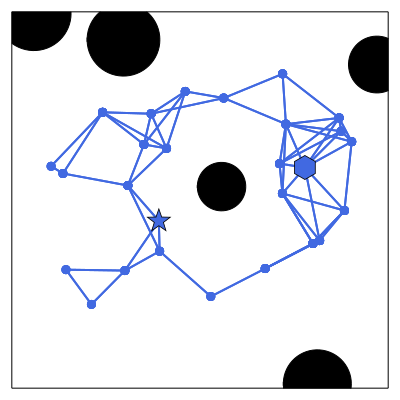

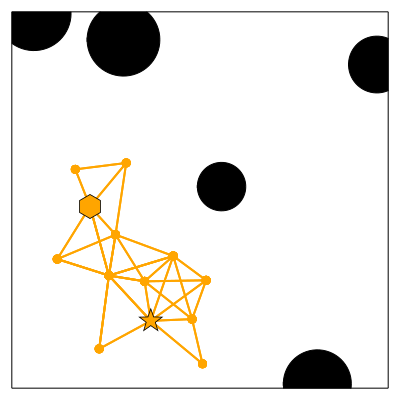

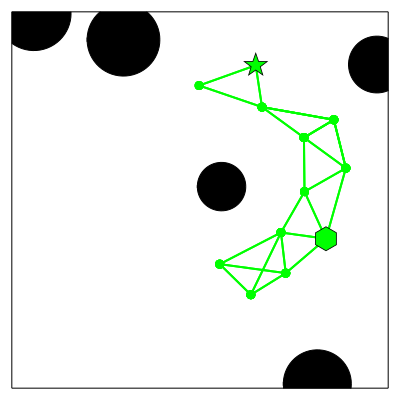

In [5]:
for i = 1:N
    color = MRMP.get_color(i)
    params_roadmap = Dict(
        :lw => 2,
        :markersize => 5,
        :markershape => :circle,
        :legend => nothing,
        :color => color,
        :markerstrokecolor => color,
    )
    params_start_goal = Dict(
        :seriestype => :scatter,
        :markersize => 12,
        :label => nothing,
        :color => color,
    )
    
    MRMP.plot_init!(MRMP.StatePoint2D)
    MRMP.plot_obs!(obstacles)
    
    # plot roadmap
    for v in roadmaps[i]
        for u_id in v.neighbors
            u = roadmaps[i][u_id]
            MRMP.plot_motion!(v.q, u.q, map(arr -> arr[i], ins_params)..., params_roadmap)
        end
    end
    MRMP.plot_start_goal!(config_init[i], config_goal[i], map(arr -> arr[i], ins_params)..., params_start_goal)
    
    savefig("./fig/point2d_roadmap_$(i).pdf")
    plot!() |> display
end

# PRM, scalability test

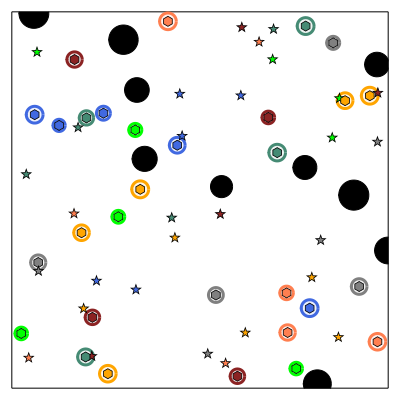

In [2]:
seed!(3)
ins = MRMP.gen_random_instance_StatePoint2D(;
    N = 30,
    rad_min = 0.015625,
    rad_max = 0.0234375,
    num_obs = 10,
    rad_obs_min = 0.025,
    rad_obs_max = 0.04,

)
config_init, config_goal, obstacles, ins_params... = ins
connect = gen_connect(config_init[1], obstacles, ins_params...)
collide = gen_collide(config_init[1], ins_params...)
check_goal = gen_check_goal(config_goal)
planner_args = [config_init, config_goal, connect, collide, check_goal]
MRMP.plot_instance!(ins...)

In [3]:
i = 1
rmp = MRMP.Solvers.PRM(config_init[i], config_goal[i], (args...) -> connect(args..., i), 500, 0.1)
nothing

In [5]:
MRMP.plot_init!(MRMP.StatePoint2D)
MRMP.plot_obs!(obstacles)
@time MRMP.plot_roadmap!([rmp], ins_params...)
color = "orange"
params = Dict(
    :seriestype => :scatter,
    :markersize => 5,
    :label => nothing,
    :color => color,
)
MRMP.plot_start_goal!(config_init[i], config_goal[i], map(arr -> arr[i], ins_params)..., params)
MRMP.plot_agent!(config_init[i], map(arr -> arr[i], ins_params)...,color)
MRMP.safe_savefig!("./fig/prm_scalability-test.pdf")

 15.948451 seconds (41.21 M allocations: 1.398 GiB, 2.07% gc time)


## SSSP

In [8]:
seed!(2)
@time solution, roadmaps = MRMP.SSSP(
    planner_args...; 
    TIME_LIMIT = 5,
    VERBOSE = 2,
    epsilon = 0.2,
    init_min_dist_thread = 0.05,
)
MRMP.validate(config_init, connect, collide, check_goal, solution)
nothing

		0.1689 sec, explored node: 00000200, f: 0.0536, depth: 0197

┌ Info: 	done, setup initial roadmaps
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:119


		0.2680 sec, explored node: 00000358, f: 0.0000, depth: 0355  0.278804 seconds (3.89 M allocations: 343.741 MiB, 20.38% gc time, 3.79% compilation time)


┌ Info: 
│ 	0.2681 sec: found solution
└ @ MRMP.Solvers.LibSSSP /Users/Kei18/Dropbox/work/project/massive-control/simulator/src/solvers/sssp.jl:178


  0.171161 seconds (657.38 k allocations: 30.460 MiB, 9.44% gc time)


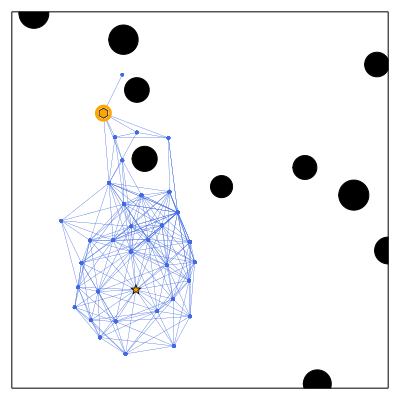

In [11]:
i = 1
rmp = roadmaps[i]
MRMP.plot_init!(MRMP.StatePoint2D)
MRMP.plot_obs!(obstacles)
@time MRMP.plot_roadmap!([rmp], ins_params...)
color = "orange"
params = Dict(
    :seriestype => :scatter,
    :markersize => 5,
    :label => nothing,
    :color => color,
)
MRMP.plot_start_goal!(config_init[i], config_goal[i], map(arr -> arr[i], ins_params)..., params)
MRMP.plot_agent!(config_init[i], map(arr -> arr[i], ins_params)...,color)
MRMP.safe_savefig!("./fig/sssp_scalability-test.pdf")
plot!()